In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import find_peaks
import numpy as np
import time

from pulsars import Pulsars, c, e_charge, e_mass
import speiser_fun as sf 
import speiser_fun_cyl as sfc
import speiser_integ 
import speiser_plots as sp

In [2]:
k = 1000.
pulsar = Pulsars(k)

B_0 = pulsar['crab']['Blc']
gamma1 = 10**0
omegaB = (e_charge*B_0/(gamma1*e_mass*c))    #γυροσυχνότητα
Delta = pulsar['crab']['rlc']/k*omegaB/c

gamma0 = np.array([1.E+2, 1.])    #αρχικός παράγοντας Lorentz
delta = 1000.    #πάχος του φύλλου ρεύματος, αδιάστατο, σε μονάδες [c/ωΒ]

In [3]:
#έναρξη χονομέτρησης
start_time = time.time()

#ολοκλήρωση
T = 3.
dt = 2*10**5

x, ux, y, uy, z, uz = speiser_integ.oloklirosi(gamma0, Delta, delta, B_0, gamma1, t_end = T, Dt = dt)[0]
x1, ux1, y1, uy1, z1, uz1 = speiser_integ.oloklirosi(gamma0, Delta, delta, B_0, gamma1, t_end = T, Dt = dt)[1]
r, ur, phi, uphi, z_cyl, uz_cyl = speiser_integ.oloklirosi(gamma0, Delta, delta, B_0, gamma1, t_end = T, Dt = dt)[2]
r1, ur1, phi1, uphi1, z_cyl1, uz_cyl1 = speiser_integ.oloklirosi(gamma0, Delta, delta, B_0, gamma1, t_end = T, Dt = dt)[3]
r2, ur2, phi2, uphi2, z_cyl2, uz_cyl2 = speiser_integ.oloklirosi(gamma0, Delta, delta, B_0, gamma1, t_end = T, Dt = dt)[4]
(dic_state, dic_state1, dic_state_cyl, dic_state_cyl1, dic_state_cyl2) = speiser_integ.oloklirosi(gamma0, Delta, delta, B_0, gamma1, t_end = 5., Dt = 8*10**4)[-1]


#λήξη χρονομέτρησης
elapsed = time.time() - start_time

print('total runtime = {:1.2E} s'.format(elapsed))

total runtime = 1.16E+02 s


<IPython.core.display.Javascript object>


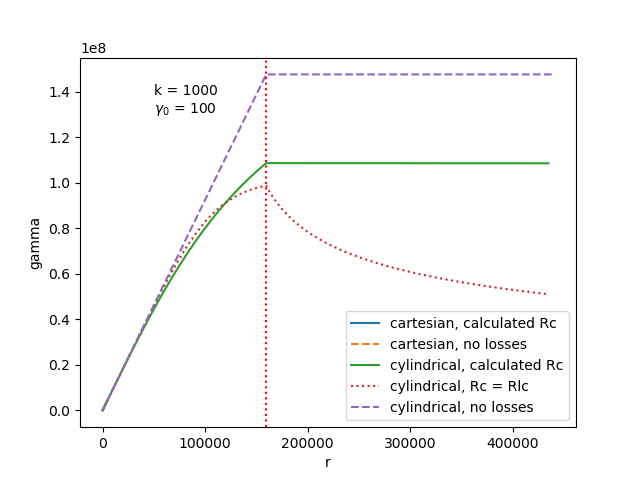

<IPython.core.display.Javascript object>


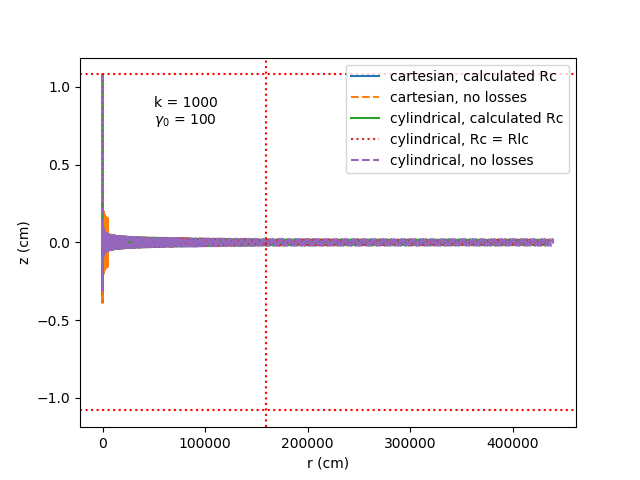

<IPython.core.display.Javascript object>


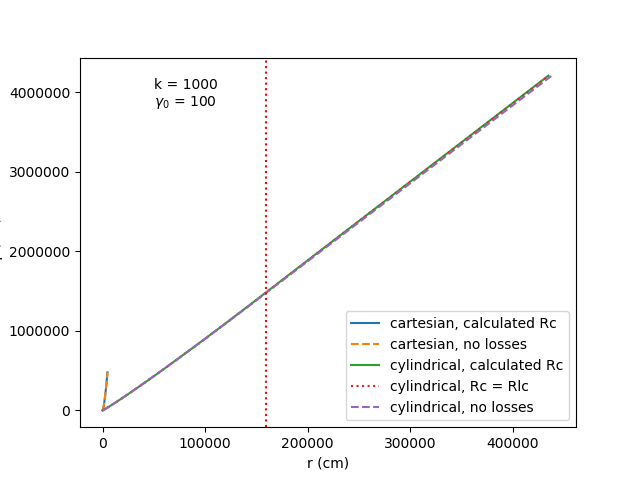

In [15]:
%matplotlib notebook

fig1 = plt.figure()
for i in range(0, len(x1)-1):
    plt.plot(z[i]*c/omegaB, sf.gamma(ux[i], uy[i], uz[i]), label = 'cartesian, calculated Rc')
    plt.plot(z1[i]*c/omegaB, sf.gamma(ux[i], uy[i], uz[i]), '--', label = 'cartesian, no losses')
    plt.plot(r[i]*c/omegaB, sf.gamma(ur[i], uphi[i], uz_cyl[i]), label = 'cylindrical, calculated Rc')
    plt.plot(r2[i]*c/omegaB, sf.gamma(ur2[i], uphi2[i], uz_cyl2[i]), ':', label = 'cylindrical, Rc = Rlc')
    plt.plot(r1[i]*c/omegaB, sf.gamma(ur1[i], uphi1[i], uz_cyl1[i]), '--', label = 'cylindrical, no losses')
    # plt.yscale('log')
    plt.xlabel('r')
    plt.ylabel('gamma')
    # plt.axes('equal')
    plt.axvline(x = Delta*c/omegaB, linestyle = ':', color = 'r')
    plt.legend(loc = 'best')
    plt.text(0.5e5, 1.3e8,  'k = {:d}\n$\gamma_0$ = {:d}'.format(int(k), int(gamma0[i])))
    fig1.savefig('γ(r)_k_{:d}.png'.format(int(k)))

fig2 = plt.figure()    
for i in range(0, len(x) - 1):
    plt.plot(z[i]*c/omegaB, y[i]*c/omegaB, label = 'cartesian, calculated Rc')
    plt.plot(z1[i]*c/omegaB, y1[i]*c/omegaB, '--', label = 'cartesian, no losses')
    plt.plot(r[i]*c/omegaB, z_cyl[i]*c/omegaB, label = 'cylindrical, calculated Rc')
    plt.plot(r2[i]*c/omegaB, z_cyl2[i]*c/omegaB, ':', label = 'cylindrical, Rc = Rlc')
    plt.plot(r1[i]*c/omegaB, z_cyl1[i]*c/omegaB, '--', label = 'cylindrical, no losses')
    plt.axhline(y = delta*c/omegaB, linestyle = ':', color = 'r')
    plt.axhline(y = -delta*c/omegaB, linestyle = ':', color = 'r')
    plt.axvline(x = Delta*c/omegaB, linestyle = ':', color = 'r')
    plt.xlabel('r (cm)')
    plt.ylabel('z (cm)')
    plt.text(0.5e5, 0.75e0, 'k = {:d}\n$\gamma_0$ = {:d}'.format(int(k), int(gamma0[i])))
    plt.legend(loc = 'best')
    fig2.savefig('epipedo_r-z_k_{:d}.png'.format(int(k))) 
    
fig3 = plt.figure()
for i in range(0, len(x) - 1):
    plt.plot(z[i]*c/omegaB, x[i]*c/omegaB, label = 'cartesian, calculated Rc')
    plt.plot(z1[i]*c/omegaB, x1[i]*c/omegaB, '--', label = 'cartesian, no losses')
    plt.plot(r[i]*c/omegaB, r[i]*phi[i]*c/omegaB, label = 'cylindrical, calculated Rc')
    plt.plot(r2[i]*c/omegaB, r2[i]*phi2[i]*c/omegaB, ':', label = 'cylindrical, Rc = Rlc')
    plt.plot(r1[i]*c/omegaB, r1[i]*phi1[i]*c/omegaB, '--', label = 'cylindrical, no losses')
    plt.xlabel('r (cm)')
    plt.ylabel('rφ (cm)')
    # plt.title('Τροχιά στο επίπεδο r-z')
    plt.axvline(x = Delta*c/omegaB, linestyle = ':', color = 'r')
    plt.legend(loc = 'best')
    plt.text(0.5e5, 3.8e6, 'k = {:d}\n$\gamma_0$ = {:d}'.format(int(k), int(gamma0[i])))
    fig3.savefig('epipedo_r-rφ_k_{:d}.png'.format(int(k)))

plt.show()

In [ ]:
dic_state_cyl

In [ ]:
len(dic_state_cyl['tcur'])

In [ ]:
sfc.Bphi(r[0][10], z_cyl[0][10], Delta, delta)

In [ ]:
# fig = plt.figure()
# for i in range(len(r[0])):
#     plt.plot(sfc.Bphi(r[0][i], z_cyl[0][i], Delta, delta))
    
# plt.show()